In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
#Other necessary imports
import matplotlib.pyplot as plt

from PIL import Image
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Defining a results visualization function
def visualize_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    #Instantiate values
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    train_recall = history.history['recall']
    train_aucroc = history.history['auc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    val_recall = history.history['val_recall']
    val_aucroc = history.history['val_auc']
    
    #Create figure for plotting
    fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle('Model Results')
    #plt.xlabel('Epoch')
    
    #Plot Loss
    ax1.plot(train_loss)
    ax1.plot(val_loss)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epochs')
    ax1.legend(['train', 'val'])
    
    #Plot Accuracy
    ax2.plot(train_acc)
    ax2.plot(val_acc)
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.legend(['train', 'val'])
    
    #Plot Recall
    ax3.plot(train_recall)
    ax3.plot(val_recall)
    ax3.set_ylabel('Recall')
    ax3.set_xlabel('Epochs')
    ax3.legend(['train', 'val'])
    
    #Plot AUC-ROC
    ax4.plot(train_aucroc)
    ax4.plot(val_aucroc)
    ax4.set_ylabel('AUC-ROC')
    ax4.set_xlabel('Epochs')
    ax4.legend(['train', 'val'])
    
    plt.show();

# Load Processed Data

In [4]:
#Load data
train_images = np.load('../input/eda-and-data-preprocessing/train_images.npy')
train_labels = np.load('../input/eda-and-data-preprocessing/train_labels.npy')

train_images_third = np.load('../input/eda-and-data-preprocessing/train_images_third.npy')
train_labels_third = np.load('../input/eda-and-data-preprocessing/train_labels_third.npy')

val_images = np.load('../input/eda-and-data-preprocessing/val_images.npy')
val_labels = np.load('../input/eda-and-data-preprocessing/val_labels.npy')

test_images = np.load('../input/eda-and-data-preprocessing/test_images.npy')
test_labels = np.load('../input/eda-and-data-preprocessing/test_labels.npy')

In [5]:
#Explore the dataset again
print ("Number of training samples: " + str(train_images.shape[0]))
print ("A third of training samples: " + str(train_images_third.shape[0]))
print ("Number of validation samples: " + str(val_images.shape[0]))
print ("Number of testing samples: " + str(test_images.shape[0]))
print ("===")
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("A third of train_images shape: " + str(train_images_third.shape))
print ("A third of train_labels shape: " + str(train_labels_third.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 25803
A third of training samples: 8601
Number of validation samples: 8602
Number of testing samples: 3823
===
train_images shape: (25803, 128, 128, 3)
train_labels shape: (25803,)
A third of train_images shape: (8601, 128, 128, 3)
A third of train_labels shape: (8601,)
val_images shape: (8602, 128, 128, 3)
val_labels shape: (8602,)
test_images shape: (3823, 128, 128, 3)
test_labels shape: (3823,)


# Modeling

In [6]:
#Build a baseline fully connected model
np.random.seed(42)
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(12, activation='relu', input_shape=(128,128,3))) # 2 hidden layers
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(7, activation='relu'))
baseline_model.add(layers.Dense(5, activation='relu'))
baseline_model.add(layers.Dense(1, activation='sigmoid'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [7]:
#View summary of model
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128, 128, 12)      48        
_________________________________________________________________
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1376263   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,376,357
Trainable params: 1,376,357
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compile baseline model
baseline_model.compile(optimizer='sgd',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'Recall', 'AUC'])

#Instantiate an EarlyStopping Object
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('best_baseline_model.h5', monitor='val_recall', mode='max', verbose=1, save_best_only=True)

#And fit the baseline model to the training images, validating on the val images
results = baseline_model.fit(train_images_third,
                            train_labels_third,
                            epochs=50,
                            batch_size=32,
                            callbacks = [es,mc],
                            validation_data=(val_images, val_labels))

2021-11-30 00:29:06.066593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
269/269 [==============================] - 15s 49ms/step - loss: 0.3715 - accuracy: 0.8540 - recall: 0.0081 - auc: 0.7765 - val_loss: 0.3122 - val_accuracy: 0.8586 - val_recall: 0.0696 - val_auc: 0.8837

Epoch 00001: val_recall improved from -inf to 0.06959, saving model to best_baseline_model.h5
Epoch 2/50
269/269 [==============================] - 11s 42ms/step - loss: 0.2914 - accuracy: 0.8816 - recall: 0.3048 - auc: 0.8659 - val_loss: 0.2736 - val_accuracy: 0.8899 - val_recall: 0.3776 - val_auc: 0.8958

Epoch 00002: val_recall improved from 0.06959 to 0.37764, saving model to best_baseline_model.h5
Epoch 3/50
269/269 [==============================] - 11s 40ms/step - loss: 0.2638 - accuracy: 0.8976 - recall: 0.4276 - auc: 0.8969 - val_loss: 0.2785 - val_accuracy: 0.8897 - val_recall: 0.3034 - val_auc: 0.9114

Epoch 00003: val_recall did not improve from 0.37764
Epoch 4/50
269/269 [==============================] - 11s 41ms/step - loss: 0.2414 - accuracy: 0.9100 - recall:

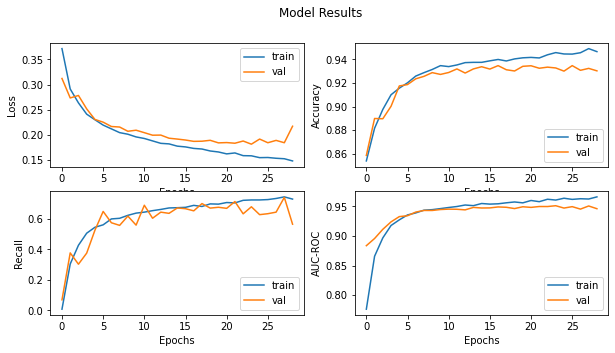

In [9]:
#Visualize model results
visualize_results(results)

In [10]:
#Save Weights
baseline_model.save_weights('baseline_model_weights.h5')